In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
from sklearn.datasets import load_diabetes
dataset=load_diabetes()

In [11]:
print(dataset["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [12]:
dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [13]:
df_diabetes=pd.DataFrame(dataset.data,columns=["age","sex","bmi","bp","s1","s2","s3","s4","s5","s6"])

In [14]:
dataset.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [15]:
df_diabetes

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [16]:
X=df_diabetes
y=dataset["target"]

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.25)

In [18]:
X_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.159513,0.180804,0.324133,0.262160,0.199716,-0.023058,0.165480,0.266254,0.266706
sex,0.159513,1.000000,0.045831,0.180247,0.017967,0.110442,-0.338820,0.308991,0.105984,0.159663
bmi,0.180804,0.045831,1.000000,0.375038,0.255045,0.257140,-0.360168,0.428866,0.450936,0.389013
bp,0.324133,0.180247,0.375038,1.000000,0.242522,0.161199,-0.107979,0.208703,0.365678,0.375972
s1,0.262160,0.017967,0.255045,0.242522,1.000000,0.892852,0.042951,0.555728,0.520963,0.308419
s2,0.199716,0.110442,0.257140,0.161199,0.892852,1.000000,-0.194325,0.656085,0.298622,0.272405
s3,-0.023058,-0.338820,-0.360168,-0.107979,0.042951,-0.194325,1.000000,-0.735179,-0.379108,-0.283662
s4,0.165480,0.308991,0.428866,0.208703,0.555728,0.656085,-0.735179,1.000000,0.615701,0.419010
s5,0.266254,0.105984,0.450936,0.365678,0.520963,0.298622,-0.379108,0.615701,1.000000,0.456972
s6,0.266706,0.159663,0.389013,0.375972,0.308419,0.272405,-0.283662,0.419010,0.456972,1.000000


<Axes: >

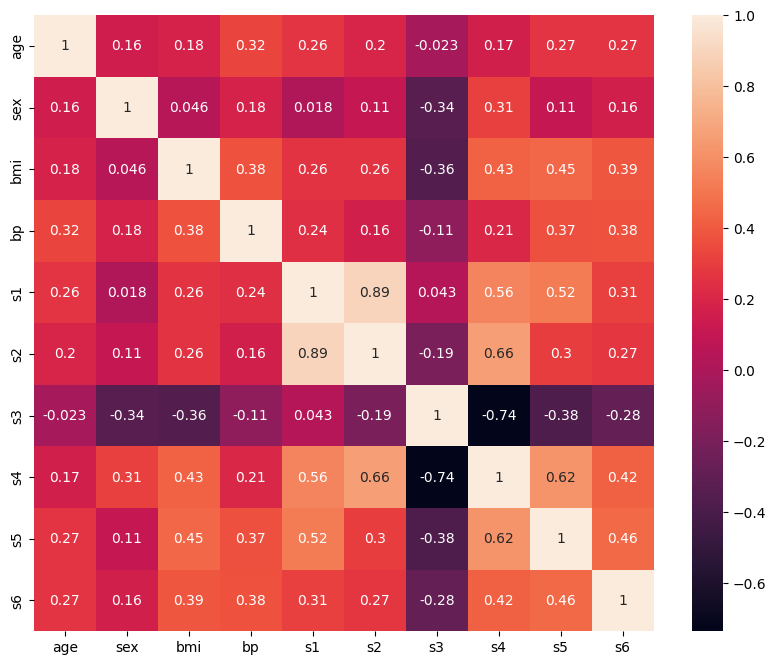

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(X_train.corr(),annot=True)

In [22]:
from sklearn.tree import DecisionTreeRegressor
treereg=DecisionTreeRegressor()

In [24]:
treereg.fit(X_train,y_train)

DecisionTreeRegressor()

In [25]:
##hyper parameter tuning
params={
    "criterion":["squared_error","friedman_mse", "absolute_error"],
    "splitter":["best","random"],
    "max_depth":[1,2,3,4,5],
    "max_features":["auto","sqrt","log2"]
}

In [32]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(treereg,param_grid=params,n_jobs=-1,cv=5,scoring="neg_mean_squared_error")
import warnings
warnings.filterwarnings("ignore")
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [33]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [34]:
y_pred=grid.predict(X_test)

In [39]:
select_mode=DecisionTreeRegressor(criterion="friedman_mse",max_depth=5,splitter="best",max_features="log2")
select_mode.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5,
                      max_features='log2')

[Text(0.47291666666666665, 0.9166666666666666, 'x[3] <= 0.024\nfriedman_mse = 6044.625\nsamples = 331\nvalue = 154.344'),
 Text(0.2125, 0.75, 'x[2] <= -0.0\nfriedman_mse = 4474.902\nsamples = 228\nvalue = 131.18'),
 Text(0.34270833333333334, 0.8333333333333333, 'True  '),
 Text(0.09166666666666666, 0.5833333333333334, 'x[8] <= -0.002\nfriedman_mse = 2505.892\nsamples = 148\nvalue = 106.858'),
 Text(0.05, 0.4166666666666667, 'x[4] <= 0.086\nfriedman_mse = 2008.968\nsamples = 111\nvalue = 95.55'),
 Text(0.03333333333333333, 0.25, 'x[6] <= -0.023\nfriedman_mse = 1861.402\nsamples = 110\nvalue = 94.327'),
 Text(0.016666666666666666, 0.08333333333333333, 'friedman_mse = 2301.816\nsamples = 14\nvalue = 123.571'),
 Text(0.05, 0.08333333333333333, 'friedman_mse = 1654.267\nsamples = 96\nvalue = 90.062'),
 Text(0.06666666666666667, 0.25, 'friedman_mse = 0.0\nsamples = 1\nvalue = 230.0'),
 Text(0.13333333333333333, 0.4166666666666667, 'x[4] <= 0.067\nfriedman_mse = 2462.061\nsamples = 37\nvalue 

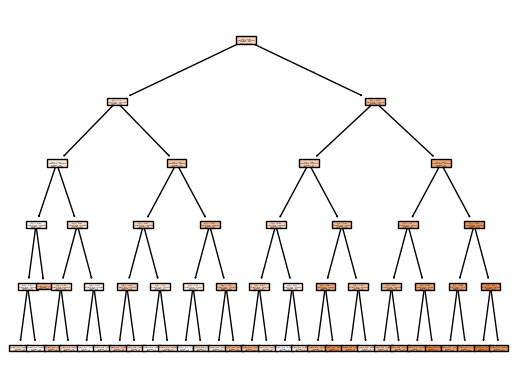

In [41]:
from sklearn import tree
plt.Figure(figsize=(15,8))
tree.plot_tree(select_mode,filled=True)